### CE88: Data Science for Smart Cities - 10/2/17

# *Linear Regressions*

Some imports first:

In [12]:
import datascience as ds
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from datetime import datetime
seaborn.set_context(rc={'lines.markeredgewidth': 1.0})
%matplotlib inline

### Load power load data in 2014

In [13]:
targetYr = 2014
table_load = ds.Table.read_table(str(targetYr) + ".csv")
table_load["DAY"] = table_load.select("DAY").apply(lambda x: datetime.strptime(x[0],"%m/%d/%y"))

table_load

DAY,HOUR,PJME,PJMW,COMED,DAYTON,AEP,DUQ,DOM,FE,DEOK,EKPC
2014-12-31 00:00:00,100,30795,6088,11633,1912,15993,1562,12337,7547,3067,1882
2014-12-31 00:00:00,200,29995,6010,11139,1875,15780,1550,12267,7334,3024,1845
2014-12-31 00:00:00,300,29688,5991,10871,1866,15769,1545,12345,7196,3021,1902
2014-12-31 00:00:00,400,29767,6051,10735,1883,15738,1546,12589,7153,3031,1894
2014-12-31 00:00:00,500,30426,6177,10714,1910,15993,1539,13046,7305,3111,1927
2014-12-31 00:00:00,600,32147,6351,10886,2004,16635,1574,13771,7539,3249,2061
2014-12-31 00:00:00,700,34613,6733,11404,2133,17476,1680,14379,8042,3445,2122
2014-12-31 00:00:00,800,35973,6964,12098,2250,18170,1777,14735,8346,3621,2244
2014-12-31 00:00:00,900,36253,7047,12409,2272,18359,1788,14573,8367,3667,2219
2014-12-31 00:00:00,1000,35998,6999,12526,2268,18173,1844,14233,8408,3650,2175


### Load weather data since 2011

In [14]:
# Load weather
table_weather = ds.Table.read_table("weather_kpit.csv")
table_weather["Local Time"] = table_weather.select("Local Time").apply(lambda x: datetime.strptime(x[0]," %m/%d/%Y %I:%M %p"))
table_weather["Date"] = table_weather.select("Local Time").apply(lambda x : x[0].date())

table_weather

UTC Timestamp,Local Time,Temperature,Dewpoint,Humidity,Pressure,Wind Speed,Condition,Date
1293861060,2011-01-01 00:51:00,50,43,77,30.03,4.6,Overcast,2011-01-01
1293864660,2011-01-01 01:51:00,50,43,77,30.01,4.6,Overcast,2011-01-01
1293868260,2011-01-01 02:51:00,51.1,43,74,30.01,4.6,Overcast,2011-01-01
1293871860,2011-01-01 03:51:00,51.1,42.1,71,29.97,6.9,Overcast,2011-01-01
1293875460,2011-01-01 04:51:00,51.1,42.1,71,29.95,4.6,Overcast,2011-01-01
1293879060,2011-01-01 05:51:00,51.1,46,83,29.99,6.9,Light Rain,2011-01-01
1293882660,2011-01-01 06:51:00,51.1,48,89,29.99,8.1,Light Rain,2011-01-01
1293886260,2011-01-01 07:51:00,50,48.9,96,29.96,4.6,Light Rain,2011-01-01
1293888180,2011-01-01 08:23:00,51.8,48.2,88,29.94,3.5,Light Rain,2011-01-01
1293889860,2011-01-01 08:51:00,51.1,50,96,29.98,5.8,Light Rain,2011-01-01


### Group data: one (max) value on each day

In [15]:
# Group temperature with date
table_daily = table_weather.select(["Date","Temperature"]).group('Date',np.max)
table_load_daily = table_load.select(["DAY","DUQ"]).group("DAY",np.max)
table_load_daily["DUQ amax"] = table_load_daily.select("DUQ amax").apply(lambda x: x[0]/1000)

# Take only target year data
table_daily = table_daily.where(list(map(lambda x: x.year == targetYr, table_daily["Date"])))
table_daily.relabel("Temperature amax","Temperature")
table_daily["Load"] = table_load_daily["DUQ amax"]

table_daily

Date,Temperature,Load
2014-01-01,33.1,1.86
2014-01-02,30.2,2.118
2014-01-03,15.1,2.124
2014-01-04,37,1.858
2014-01-05,46,1.831
2014-01-06,48.9,2.29
2014-01-07,3.9,2.367
2014-01-08,23,2.194
2014-01-09,33.1,2.009
2014-01-10,46.4,1.902


**Q1**: From here, we only want to analyze power loads by temperature during the Summer. Define a new table of the same columns (Date, Temperature, and Load), but only for the Summer (June ~ Aug).

In [16]:
# Answer:

# Take only summers
table_summer = table_daily.where(list(map(lambda x: x.month >= 6 and x.month <=8, table_daily["Date"])))

table_summer

Date,Temperature,Load
2014-06-01,82,1.922
2014-06-02,78.1,2.169
2014-06-03,82.9,2.384
2014-06-04,73.9,2.049
2014-06-05,69.1,1.835
2014-06-06,75,1.81
2014-06-07,79,1.845
2014-06-08,78.1,1.858
2014-06-09,68,1.808
2014-06-10,73.9,1.895


### Plot Temperature vs Power loads

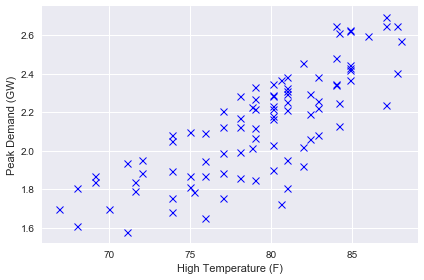

In [17]:
# Plot temperature vs load
plt.plot(table_summer["Temperature"], table_summer["Load"], "bx")
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.xlabel("High Temperature (F)")
plt.ylabel("Peak Demand (GW)")
plt.tight_layout()
plt.savefig("scatter.pdf")

**Q2**: Describe the correlations between temperature and peak demand. What can you tell from the plot?

### Estimate parameters of Linear Regressor: Least squares fit

$$\theta_1 = \frac{\sum_{i\in \text{Data}}\ x_i (y_i - E(y)) }{\sum_{i \in \text{Data}}\ x_i (x_i - E(x))}$$
$$\theta_2 = -\theta_1E(x) + E(y)$$

In [18]:
# Lower level...
x = table_summer["Temperature"]
y = table_summer["Load"]
theta1 = np.sum(x*(y-np.mean(y)))/np.sum(x*(x-np.mean(x)))
theta2 = -theta1*np.mean(x) + np.mean(y)
theta1, theta2

(0.044152538599092142, -1.3636304123131144)

$$\theta = (X^\top X)^{-1} X^\top y$$
$$ X = \begin{bmatrix}
x_1&1\\
x_2&1\\
\vdots&\vdots\\
x_N&1
\end{bmatrix} \quad \text{where} \quad N = \text{number of data}$$ 

In [26]:
# Using linear algebra toolkit...
X = np.vstack([table_summer["Temperature"], np.ones(len(table_summer.column(0)))]).T
y = table_summer["Load"]
theta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
theta

array([ 0.04415254, -1.36363041])

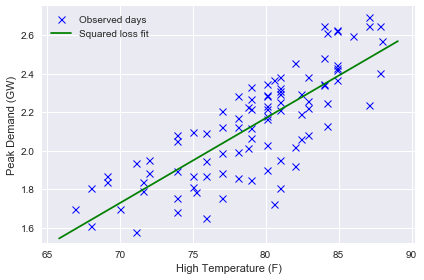

In [20]:
# Plot the linear regression
plt.plot(table_summer["Temperature"], table_summer["Load"], "bx",
         xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'g-')
plt.ylim(ylim)
plt.legend(["Observed days", "Squared loss fit"], loc="upper left")
plt.xlabel("High Temperature (F)")
plt.ylabel("Peak Demand (GW)")
plt.tight_layout()
plt.savefig("fit.pdf")

### Weekdays analysis

Now, we want to analyze the power loads only for the weekdays. 

In [21]:
# Collect temperature/load for weekdays
table_summer["Weekday"] = list(map(lambda x : x.weekday() <= 4, table_summer["Date"]))
X = np.vstack([table_summer["Temperature"], 
               table_summer["Weekday"],
               np.ones(len(table_summer.column(0)))]).T
y = table_summer["Load"]

# Estimate parameters of the linear regressor for weekdays
theta = np.linalg.solve(X.T.dot(X), X.T.dot(y))

np.vstack([table_summer["Temperature"], 
               table_summer["Weekday"],
               np.ones(len(table_summer.column(0)))]).shape

table_summer["Temperature"].shape, table_summer["Weekday"]

((92,), array([False,  True,  True,  True,  True,  True, False, False,  True,
         True,  True,  True,  True, False, False,  True,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,
        False, False,  True,  True,  True,  True,  True, False, False,
         True,  True,  True,  True,  True, False, False,  True,  True,
         True,  True,  True, False, False,  True,  True,  True,  True,
         True, False, False,  True,  True,  True,  True,  True, False,
        False,  True,  True,  True,  True,  True, False, False,  True,
         True,  True,  True,  True, False, False,  True,  True,  True,
         True,  True, False, False,  True,  True,  True,  True,  True,
        False, False], dtype=bool))

**Q3**: Plot temperature vs. power loads only for the weekdays with the linear regression.

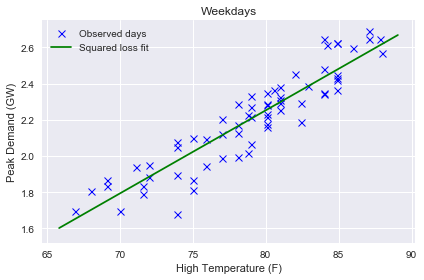

In [22]:
# Answer:

plt.plot(table_summer.where(table_summer["Weekday"]==1)["Temperature"], 
         table_summer.where(table_summer["Weekday"]==1)["Load"], "bx",
         xlim, [theta[0]*xlim[0]+theta[1]+theta[2], theta[0]*xlim[1]+theta[1]+theta[2]], 'g-')
plt.ylim(ylim)
plt.legend(["Observed days", "Squared loss fit", "Absolute loss fit"], loc="upper left")
plt.xlabel("High Temperature (F)")
plt.ylabel("Peak Demand (GW)")
plt.title("Weekdays")
plt.tight_layout()
plt.savefig("weekday_fit.pdf")

**Q4**: Plot temperature vs. power loads only for the weekends with the linear regression.

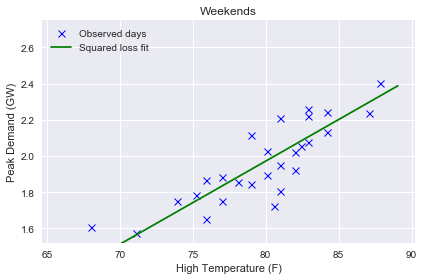

In [23]:
# Answer:


### Prediction of power loads by temperature using linear regressor

Import Scikit learn for linear model

In [24]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score